In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
gld_data = pd.read_csv('gld_price_data.csv')
gld_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# Here SPX - stock price, GLD - gold price, USO - US oil price, SLV - silver price, EUR/USD - currency value ratio.

In [3]:
gld_data.shape

(2290, 6)

In [4]:
gld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


# No missing values in dataset.

In [5]:
gld_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

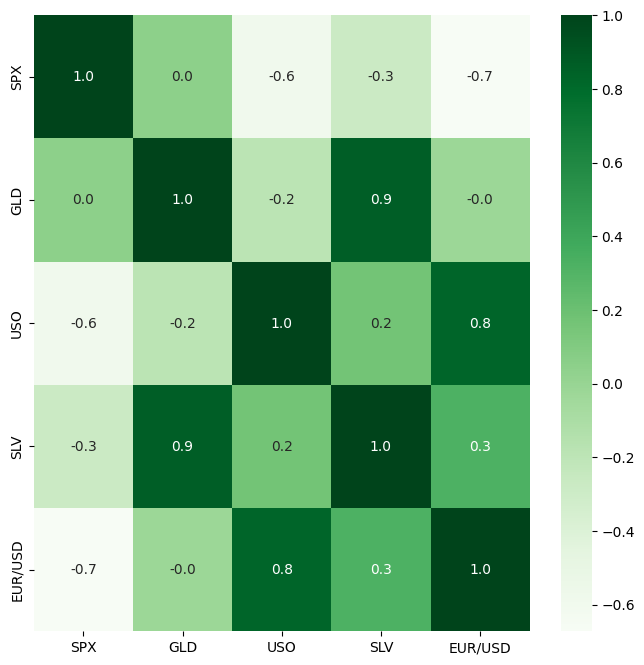

In [6]:
correlation = gld_data.corr(numeric_only = True)
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, fmt='.1f',annot=True, cmap='Greens')

In [7]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# Gold price is highly related to silver price.

<Axes: xlabel='GLD', ylabel='Count'>

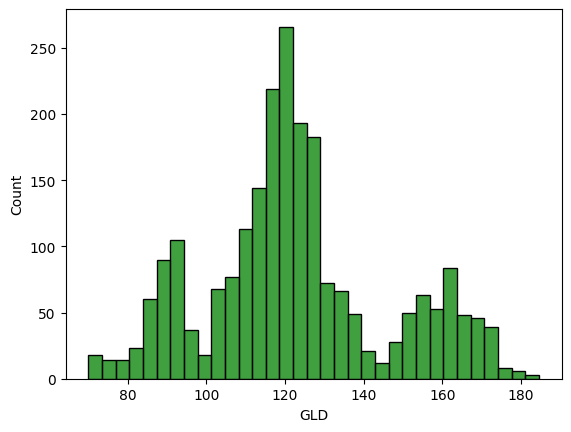

In [8]:
sns.histplot(gld_data['GLD'], color='green')

# Most gold price values are in the range of 120.

In [9]:
X = gld_data.drop(['Date','GLD'], axis=1)
Y = gld_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [11]:
rf_reg = RandomForestRegressor(n_estimators = 500, n_jobs = -1, random_state = 42)
rf_reg.fit(X_train.values, Y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
Y_pred_rf = rf_reg.predict(X_test.values)

In [13]:
r2_test = r2_score(Y_test, Y_pred_rf)
print(r2_test)

0.9902562924777144


# High r2 score tells us that the model fits the dataset well and explains all of the spread.

In [14]:
gld_input = (2132.550049,11.49,16.610001,1.104972)
gld_input_np_arr = np.asarray(gld_input)
gld_input_reshaped = gld_input_np_arr.reshape(1, -1)
input_pred = rf_reg.predict(gld_input_reshaped)
input_pred

array([120.07357907])

# Predicted gold value as 120.07 where actual value is 120.03.

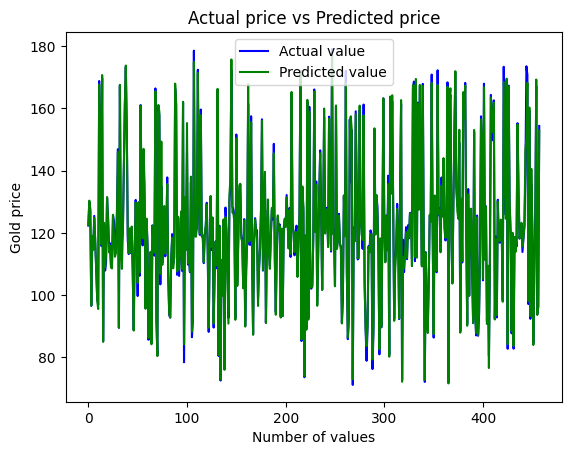

In [15]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual value')
plt.plot(Y_pred_rf, color='green', label='Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

# From the graph we can see that the model has predicted values close to the actual gold values.